<a href="https://colab.research.google.com/github/gomyk/NNStudy/blob/moonwon/CNN_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl

/bin/bash: pip3d: command not found


In [0]:
!pip3 install torch-vision


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
#train_set, val_set = torch.utils.data.random_split(trainset, [int(len(trainset)*0.9), int(len(trainset)*0.1)])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False, num_workers=2)

Files already downloaded and verified


In [0]:
print(torch.cuda.is_available())

True


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

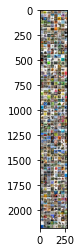

tensor(26)


In [0]:
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % labels[j] for j in range(1)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256, 512, 3, padding=1),
            nn.Dropout()
        )
        
        self.conv_block_head = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.conv_block_mid_0 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.conv_block_mid_1 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.conv_block_mid_2 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.conv_block_mid_3 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.conv_block_mid_4 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
        self.conv_block_tail_1 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        
        self.conv_block_tail_2 = nn.Sequential(
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.conv_block_tail_3 = nn.Sequential(
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
        self.fc_1 = nn.Sequential(
            nn.Linear(512 * 4 * 4, 1024),
            nn.Dropout(),
            nn.Linear(1024, 512),
            nn.Dropout(),
            nn.Linear(512, 100)
        )
    def forward(self, x):
        x = self.conv_block_head(x)
        res0 = x = self.conv_block_mid_0(x)
        res1 = x = self.conv_block_mid_1(torch.add(res0, x))
        res2 = x = self.conv_block_mid_2(torch.add(res1, x))
        res3 = x = self.conv_block_mid_3(torch.add(res2, x))
        res4 = x = self.conv_block_mid_4(torch.add(res3, x))
        t_res1 = x = self.conv_block_tail_1(torch.add(res4, x))
        t_res2 = x = self.conv_block_tail_2(torch.add(t_res1, x))
        x = self.conv_block_tail_3(torch.add(t_res2, x))
        x = x.view(-1, 512 * 4 * 4) 
        x = self.fc_1(x)
        return x
    
net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)

In [0]:
for epoch in range(100): # 데이터셋을 수차례 반복합니다. 
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):

        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 20 == 19:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            net.eval()
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            net.train()
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))
print('Finished Training')

[1,    20] loss: 4.591
[1,    40] loss: 4.506
[1,    60] loss: 4.428
Accuracy of the network on the test images: 8 %
[2,    20] loss: 4.350
[2,    40] loss: 4.301
[2,    60] loss: 4.261
Accuracy of the network on the test images: 10 %
[3,    20] loss: 4.207
[3,    40] loss: 4.195
[3,    60] loss: 4.184
Accuracy of the network on the test images: 12 %
[4,    20] loss: 4.144
[4,    40] loss: 4.107
[4,    60] loss: 4.073
Accuracy of the network on the test images: 14 %
[5,    20] loss: 4.010
[5,    40] loss: 4.007
[5,    60] loss: 4.004
Accuracy of the network on the test images: 16 %
[6,    20] loss: 3.952
[6,    40] loss: 3.944
[6,    60] loss: 3.931
Accuracy of the network on the test images: 18 %
[7,    20] loss: 3.851
[7,    40] loss: 3.825
[7,    60] loss: 3.841
Accuracy of the network on the test images: 20 %
[8,    20] loss: 3.783
[8,    40] loss: 3.754
[8,    60] loss: 3.742
Accuracy of the network on the test images: 20 %
[9,    20] loss: 3.721
[9,    40] loss: 3.709
[9,    60] 